<a href="https://colab.research.google.com/github/Obreintelly/Autolib-EDA/blob/main/WEEK_4_HYPOTHESIS_TESTING_AUTOLIB_DATASET_27032021_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB ELECTRIC CAR SHARING DATA ANALYSIS**

# 1. Importing Libraries

In [1]:
#Importing Pandas
import pandas as pd

In [2]:
#Importing Numpy
import numpy as np

In [3]:
#Importing Matplotlib
import matplotlib.pyplot as plt


In [4]:
#Importing Seaborn
import seaborn as sns

# 2. Loading Our Dataset

In [5]:
#dataset = 'http://bit.ly/DSCoreAutolibDataset'

#df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

df= pd.read_csv('http://bit.ly/DSCoreAutolibDataset')



# 3. Previewing Our Dataset

In [6]:
#Displaying first 5 rows of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
#Displaying last 5 rows
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [8]:
#Exploring our dataset
#We check our columns have the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [9]:
#Checking our columns
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [10]:
#Checking our rows
df.index

RangeIndex(start=0, stop=16085, step=1)

# 4. Tidying Up Our Dataset

In [11]:
#Ensuring Consistency in our dataset
#We standardize our columns

df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')
df.columns


Index(['POSTAL_CODE', 'DATE', 'N_DAILY_DATA_POINTS', 'DAYOFWEEK', 'DAY_TYPE',
       'BLUECARS_TAKEN_SUM', 'BLUECARS_RETURNED_SUM', 'UTILIB_TAKEN_SUM',
       'UTILIB_RETURNED_SUM', 'UTILIB_14_TAKEN_SUM', 'UTILIB_14_RETURNED_SUM',
       'SLOTS_FREED_SUM', 'SLOTS_TAKEN_SUM'],
      dtype='object')

In [12]:
df.head(1)

,POSTAL_CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [13]:
#Ensuring validity in our dataset
df['POSTAL_CODE'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [14]:
#Checking the Date column contains only entries for 2018
df['DATE'].unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [15]:
#Checking for any peculiar values in Number of Daily Data Points
df['N_DAILY_DATA_POINTS'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [16]:
#Checking to ensure the codes for Day week match the dataset description 
df['DAYOFWEEK'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [17]:
#Checking we have the correct Day Type
df['DAY_TYPE'].unique()

array(['weekday', 'weekend'], dtype=object)

In [18]:
#Ensuring Completeness in our dataset
# Are their any missing values?
df.isna().any().any()

False

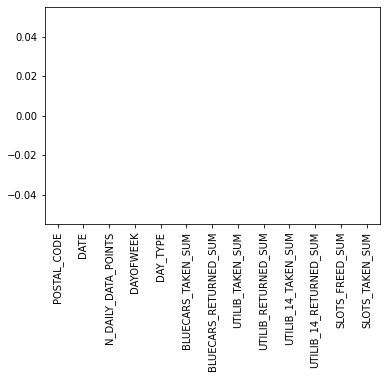

In [19]:
#No missing values in our dataset
df.isna().sum().plot(kind='bar')

In [20]:
#Ensuring Completeness in our dataset
#Are there any duplicates?

df.duplicated().any()

False

In [21]:
#Dropping Columns we do not need to respond to the question
#Since we will be investigating a claim about blue cars, we do not need
# Utilib and Utilib 14

df.drop(['N_DAILY_DATA_POINTS','UTILIB_TAKEN_SUM', 'UTILIB_RETURNED_SUM', 'UTILIB_14_TAKEN_SUM','UTILIB_14_RETURNED_SUM', 'SLOTS_FREED_SUM', 'SLOTS_TAKEN_SUM'], axis=1, inplace=True)

In [22]:
#Displaying our new dataset size
df.shape

(16085, 6)

# 5. Finding Outliers in our dataset & dealing with them

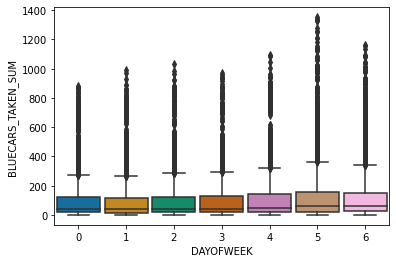

In [23]:
#Checking for Outliers in Our Dataset
bplot =sns.boxplot(y='BLUECARS_TAKEN_SUM', x='DAYOFWEEK', data= df,  width=0.9, palette='colorblind')

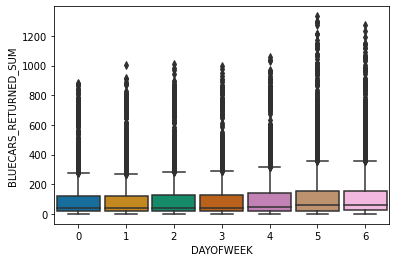

In [24]:
#Checking for outliers in Bluecars Returned
bplot =sns.boxplot(y='BLUECARS_RETURNED_SUM', x='DAYOFWEEK', data= df,  width=0.9, palette='colorblind')

In [25]:
df['BLUECARS_TAKEN_SUM'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: BLUECARS_TAKEN_SUM, dtype: float64

In [26]:
#We have outliers in our dataset
#We therefore proceed to rempve them because of the huge ranges
#i.e the lowest sum is zero and 1352 as the highest, 
#Consequences of inaction will be dire than cure
#

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [27]:
#Investigating the impact of our cure

df.skew()

POSTAL_CODE              0.629778
DAYOFWEEK                0.022194
BLUECARS_TAKEN_SUM       1.901044
BLUECARS_RETURNED_SUM    1.905661
dtype: float64

In [28]:
df['BLUECARS_TAKEN_SUM'].describe()

count    12020.000000
mean        50.772962
std         49.901088
min          0.000000
25%         16.000000
50%         34.000000
75%         68.000000
max        302.000000
Name: BLUECARS_TAKEN_SUM, dtype: float64

In [29]:
#Displaying our new dataset size
df.shape

(12020, 6)

In [30]:
#Ensuring Uniformity in our dataset
#Change the Date into the correct data type

df['DATE']= pd.to_datetime(df['DATE'])
df['DATE']

3899    2018-01-01
3900    2018-01-02
3901    2018-01-03
3902    2018-01-04
3903    2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: DATE, Length: 12020, dtype: datetime64[ns]

# 6. Saving our Clean Dataset

In [31]:
df.to_csv('utilib.csv', index=False)

In [32]:
#Loading our dataset

utilib= pd.read_csv('/content/utilib.csv')

utilib.head()

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
0,91330,2018-01-01,0,weekday,19,9
1,91330,2018-01-02,1,weekday,10,10
2,91330,2018-01-03,2,weekday,11,13
3,91330,2018-01-04,3,weekday,5,8
4,91330,2018-01-05,4,weekday,10,6


# 7. Univariate Analysis

In [33]:
#Descriptive Statistics of Bluecars Returned
df['BLUECARS_RETURNED_SUM'].describe()

count    12020.000000
mean        50.775707
std         49.699869
min          0.000000
25%         17.000000
50%         34.000000
75%         68.000000
max        306.000000
Name: BLUECARS_RETURNED_SUM, dtype: float64

In [34]:
# An average of 51 bluecars are returned on a daily basis
#The most number of cars returned on a day is 306

In [35]:
#Descriptive Statistics of Bluecars Returned
df['BLUECARS_RETURNED_SUM'].mode()

0    13
dtype: int64

In [36]:
#Determining Skeweness of Blue Cars Returned
df['BLUECARS_RETURNED_SUM'].skew()

1.9056609919692011

In [37]:
df['BLUECARS_RETURNED_SUM'].kurt()

4.332383381274114

In [38]:
#Descriptive Statistics of Bluecars Taken
df['BLUECARS_TAKEN_SUM'].describe()

count    12020.000000
mean        50.772962
std         49.901088
min          0.000000
25%         16.000000
50%         34.000000
75%         68.000000
max        302.000000
Name: BLUECARS_TAKEN_SUM, dtype: float64

In [39]:
df['BLUECARS_TAKEN_SUM'].mode()

0    12
dtype: int64

In [40]:
df['BLUECARS_TAKEN_SUM'].skew()

1.90104407989754

In [41]:
df['BLUECARS_TAKEN_SUM'].kurt()

4.321198853134719

Text(0.5, 1.0, 'Distribution of taken bluecars in a week in 2018')

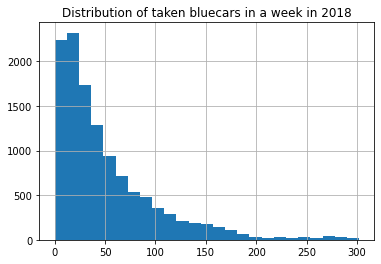

In [42]:
#Plotting a histogram of the total cars taken in a week

df['BLUECARS_TAKEN_SUM'].hist(bins=25)
plt.title('Distribution of taken bluecars in a week in 2018')

Text(0.5, 1.0, 'Distribution of returned bluecars in a week in 2018')

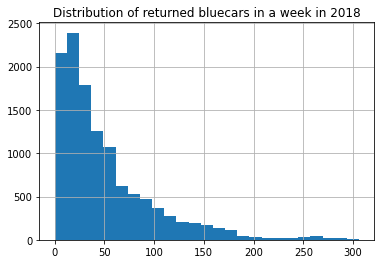

In [43]:
#Plotting a histogram of the total cars returned in a week

df['BLUECARS_RETURNED_SUM'].hist(bins=25)
plt.title('Distribution of returned bluecars in a week in 2018')

Text(0.5, 1.0, 'Percentage Breakdown of Weekdays Vs Weekends')

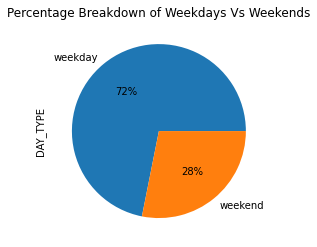

In [44]:
#Pie-chart showing breakdown btn weekdays vs weekends

df['DAY_TYPE'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Percentage Breakdown of Weekdays Vs Weekends')

# 8. Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


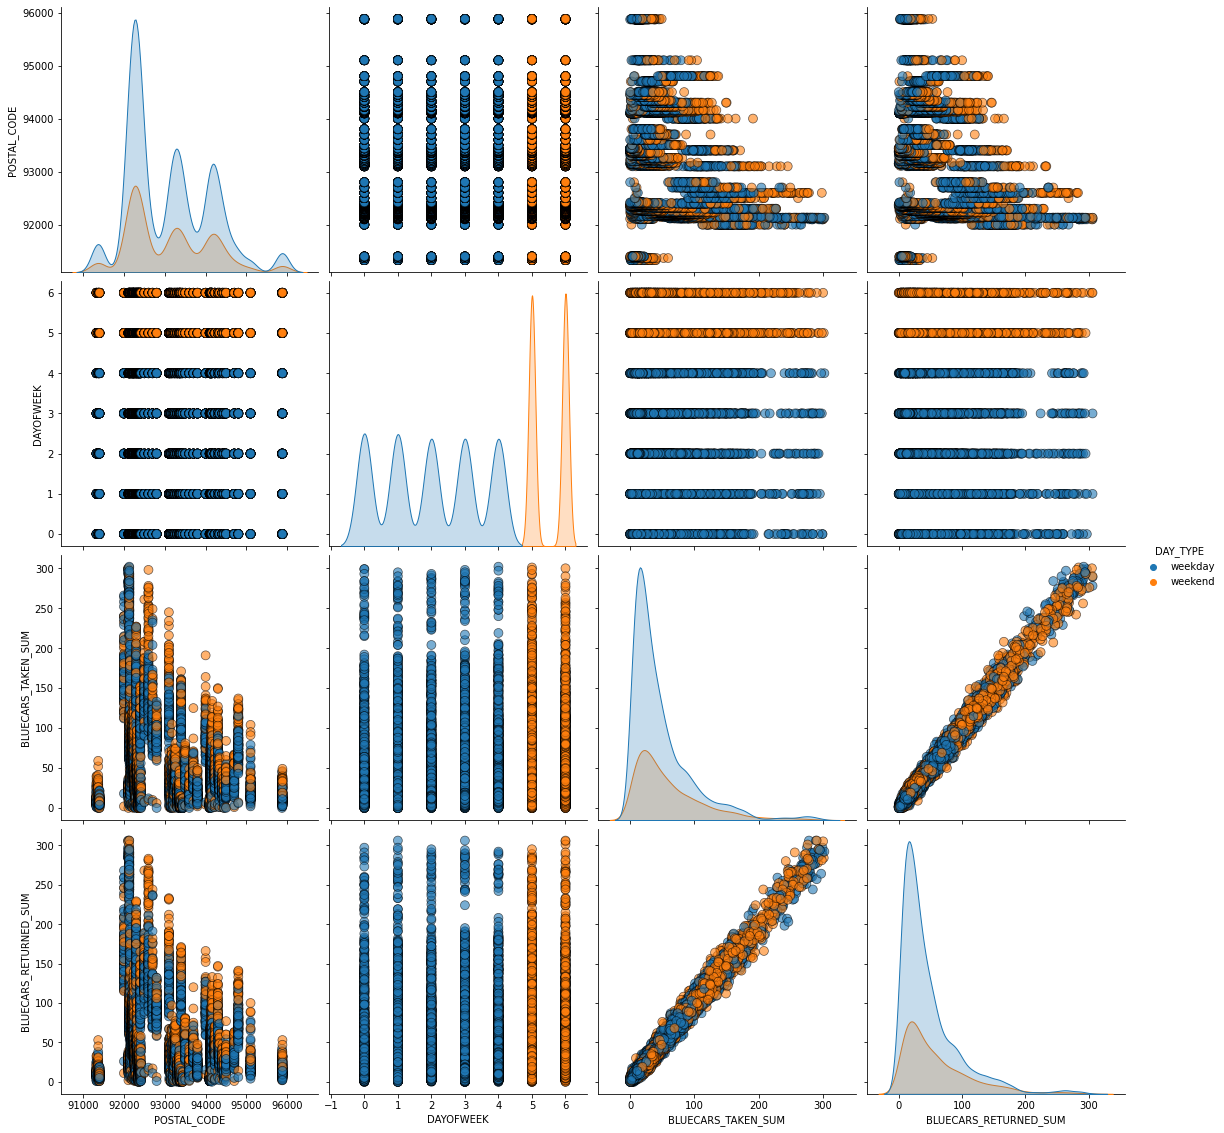

In [45]:
#Crossplots

sns.pairplot(df, hue='DAY_TYPE', diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size= 4 )

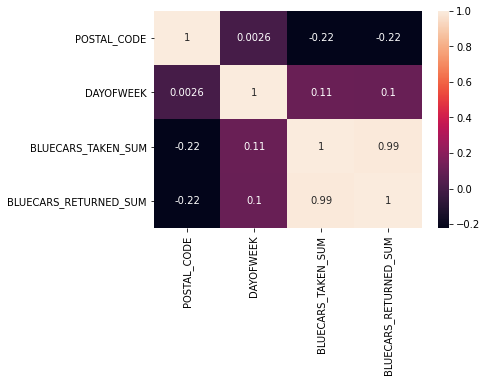

In [46]:
#General Overview of our dataset using heatmaps
#Heatmap below shows how the various variables correlate
sns.heatmap(df.corr(),annot=True)
plt.show()

In [55]:
weekdays_only = df[df['DAY_TYPE']=='weekday']
weekdays_only

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
3899,91330,2018-01-01,0,weekday,19,9
3900,91330,2018-01-02,1,weekday,10,10
3901,91330,2018-01-03,2,weekday,11,13
3902,91330,2018-01-04,3,weekday,5,8
3903,91330,2018-01-05,4,weekday,10,6
...,...,...,...,...,...,...
16078,95880,2018-06-13,2,weekday,12,13
16079,95880,2018-06-14,3,weekday,15,13
16080,95880,2018-06-15,4,weekday,15,10
16083,95880,2018-06-18,0,weekday,11,14


In [57]:
# Mean of cars picked on a weekday
picked_weekdays_mean = weekdays_only['BLUECARS_TAKEN_SUM'].mean()
picked_weekdays_mean

47.15661534899873

In [47]:
weekends_only= df[df['DAY_TYPE']=='weekend']
weekends_only.head()

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
3904,91330,2018-01-06,5,weekend,6,11
3905,91330,2018-01-07,6,weekend,28,17
3911,91330,2018-01-13,5,weekend,24,21
3912,91330,2018-01-14,6,weekend,27,30
3918,91330,2018-01-20,5,weekend,16,10


In [48]:
saturday= weekends_only[weekends_only['DAYOFWEEK']==5]
saturday.head()

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
3904,91330,2018-01-06,5,weekend,6,11
3911,91330,2018-01-13,5,weekend,24,21
3918,91330,2018-01-20,5,weekend,16,10
3925,91330,2018-01-27,5,weekend,13,17
3932,91330,2018-02-03,5,weekend,26,24


In [49]:
saturday.shape

(1684, 6)

In [50]:
sat_pick =saturday['BLUECARS_TAKEN_SUM']

In [51]:
sunday= weekends_only[weekends_only['DAYOFWEEK']==6]
sunday.head()

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
3905,91330,2018-01-07,6,weekend,28,17
3912,91330,2018-01-14,6,weekend,27,30
3919,91330,2018-01-21,6,weekend,18,14
3926,91330,2018-01-28,6,weekend,27,15
3933,91330,2018-02-04,6,weekend,21,14


In [52]:
sunday.shape

(1697, 6)

In [53]:
sun_pick= sunday['BLUECARS_TAKEN_SUM']

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
11207,93300,2018-01-28,6,weekend,15,16
8222,92350,2018-05-06,6,weekend,24,29
10320,93130,2018-02-11,6,weekend,31,25
13217,94100,2018-04-08,6,weekend,8,6
14294,94220,2018-03-25,6,weekend,52,55
...,...,...,...,...,...,...
12877,93800,2018-03-11,6,weekend,29,22
7980,92340,2018-01-28,6,weekend,32,26
5863,92190,2018-04-08,6,weekend,96,82
9384,92500,2018-02-11,6,weekend,143,137


# 9. Hypothesis Testing 
Sunday is the busier than the weekdays

# Null Hypothesis:
 Ho: mean of Bluecars picked on Sunday = mean of Bluecars picked on weekdays


#Alternative Hypothesis
 H1: mean of Bluecars picked on Sunday != mean of Bluecars picked on weekdays


 Ho: mean on Sunday = 47.16

 H1: mean on Sunday != 47.16

In [ ]:
# Having defined the Null and ALternative Hypothesis, we set the level of significance
# alpha = 0.05

# 10. Sampling

In [58]:
#Before carrying out the Hypothesis Test,
#We need to select a sampling technique
#and then select samples.

#10% of the total entries on SUnday would be a good sample size
#Selecting a sample for Sunday

sunday_sample =sunday.sample(n=168, replace="False")
sunday_sample

,POSTAL_CODE,DATE,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
5735,92170,2018-05-06,6,weekend,71,76
10969,93230,2018-04-15,6,weekend,27,27
8159,92350,2018-03-04,6,weekend,22,20
15807,95870,2018-02-04,6,weekend,18,22
15867,95870,2018-04-08,6,weekend,21,19
...,...,...,...,...,...,...
6569,92240,2018-01-21,6,weekend,116,140
14211,94160,2018-06-17,6,weekend,114,111
8225,92350,2018-05-20,6,weekend,21,15
10203,93110,2018-03-25,6,weekend,41,38


In [59]:
#Summary Statistics in our Sample
sunday_sample.describe()

,POSTAL_CODE,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
count,168.000000,168.0,168.000000,168.000000
mean,93145.059524,6.0,60.660714,60.220238
std,1007.321103,0.0,49.614059,51.050923
min,91330.000000,6.0,3.000000,4.000000
25%,92260.000000,6.0,23.000000,19.750000
50%,93120.000000,6.0,49.000000,46.000000
75%,94110.000000,6.0,85.250000,82.250000
max,95880.000000,6.0,250.000000,266.000000


In [60]:
#Summary Statistics of our weekday data
weekdays_only.describe()

,POSTAL_CODE,DAYOFWEEK,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
count,8639.000000,8639.000000,8639.000000,8639.000000
mean,93091.108925,1.972219,47.156615,47.258132
std,1005.958825,1.417784,47.876180,47.353433
min,91330.000000,0.000000,0.000000,0.000000
25%,92270.000000,1.000000,15.000000,15.000000
50%,93100.000000,2.000000,31.000000,31.000000
75%,94000.000000,3.000000,62.000000,61.000000
max,95880.000000,4.000000,302.000000,306.000000


In [64]:
#Testing our Hypothesis
# Given that we have a sample greater than 30, the Z-test will be the most appropriate test

z_test = (sunday_sample['BLUECARS_TAKEN_SUM'].mean() - weekdays_only['BLUECARS_TAKEN_SUM'].mean() ) / 47.88
z_test

0.2820404957542932

In [69]:
# Computing Our p-values
from scipy import stats
p_value = stats.norm.sf(abs(z_test))

alpha =0.05/2 #Since we are conducting a two tail test

if p_value  < alpha:
  print('Reject the Null Hypothesis')
else:
  print('DO NOT Reject the Null Hypothesis')


DO NOT Reject the Null Hypothesis


In [ ]:
#Conclusion & Interpretation
# There is insufficient evidence to prove that the average number of cars picked on Sunday varies from the number picked on a weekday. 